In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)



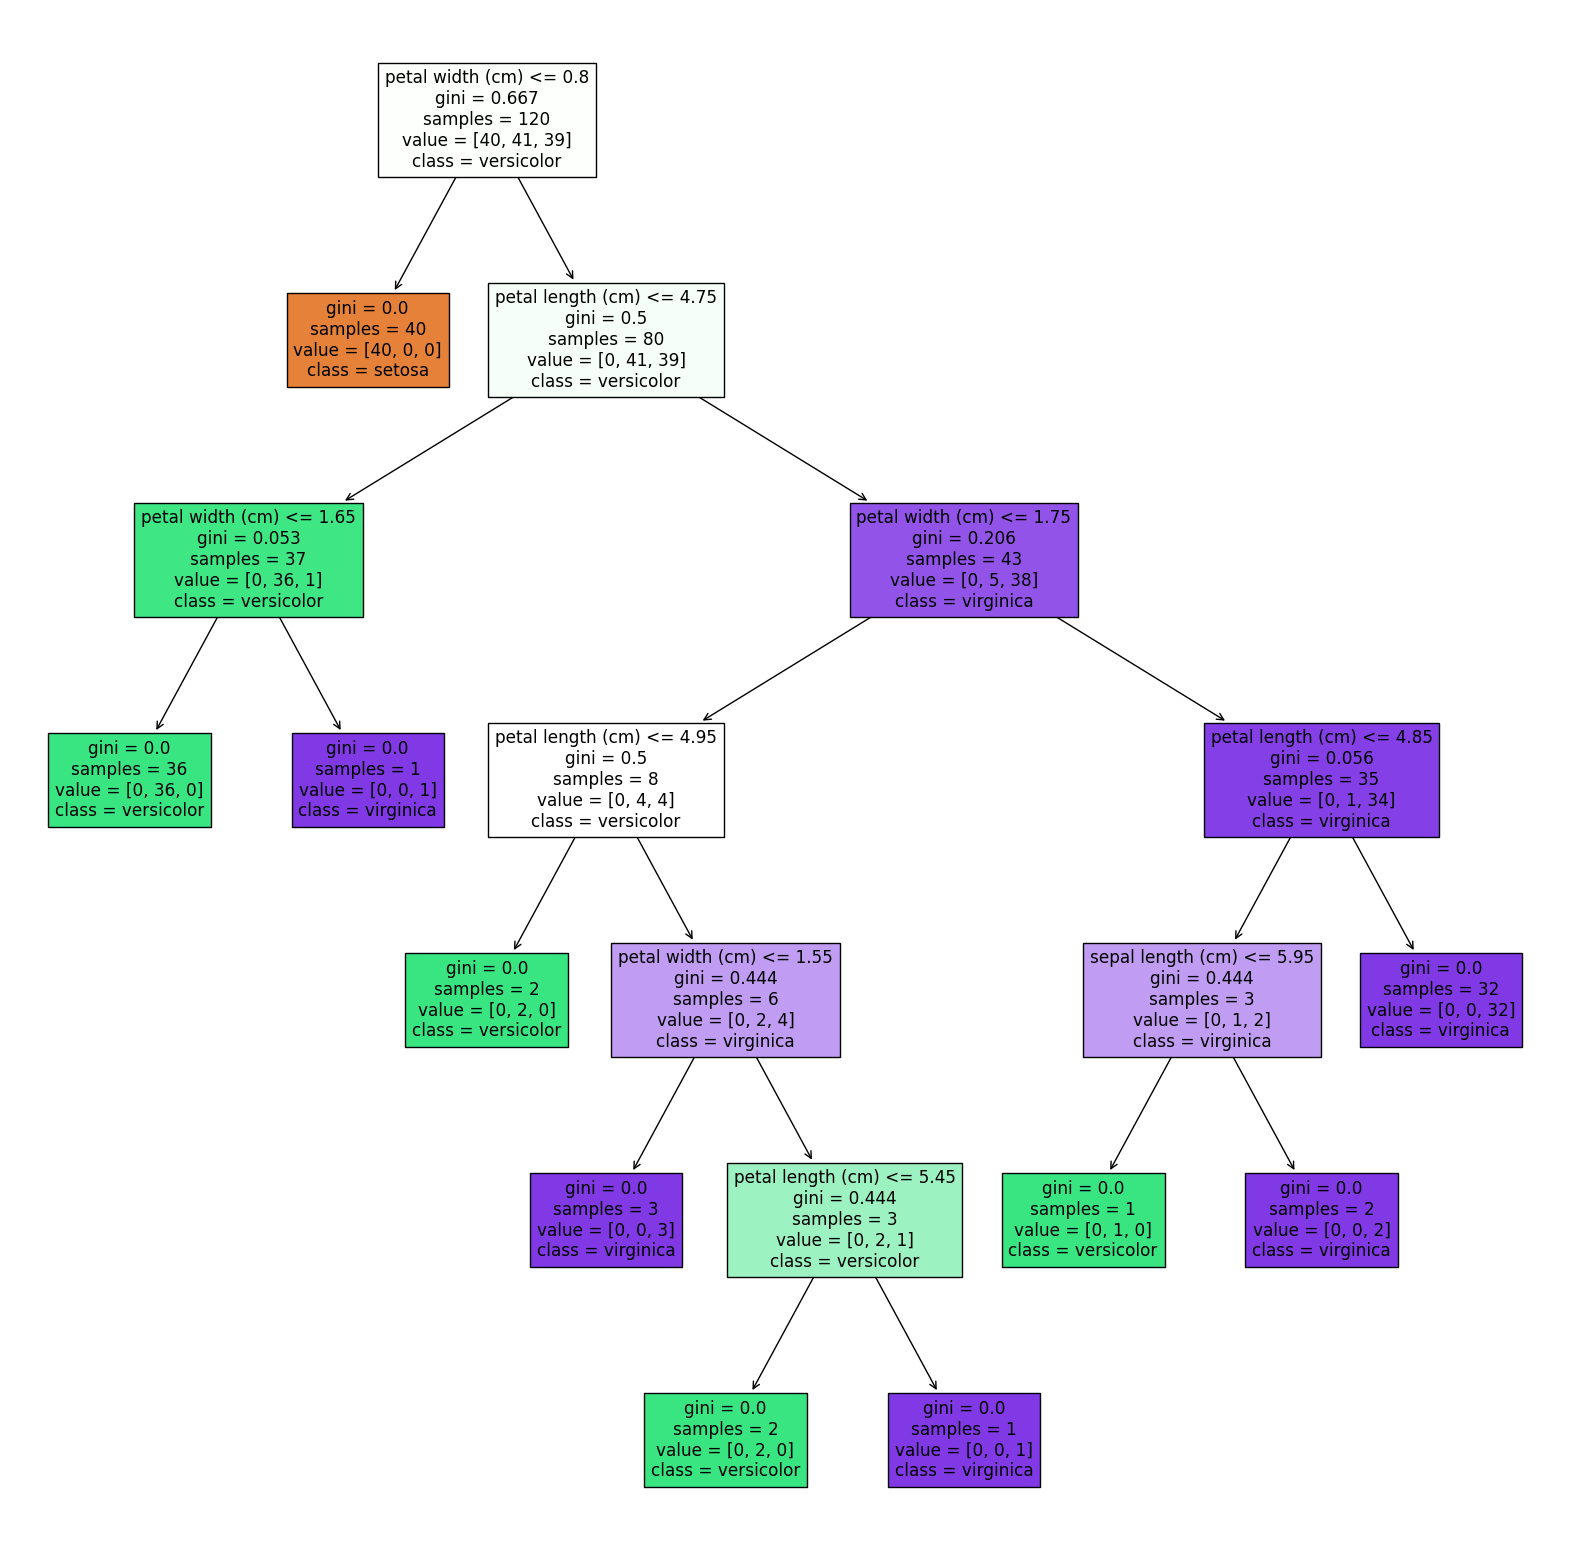

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


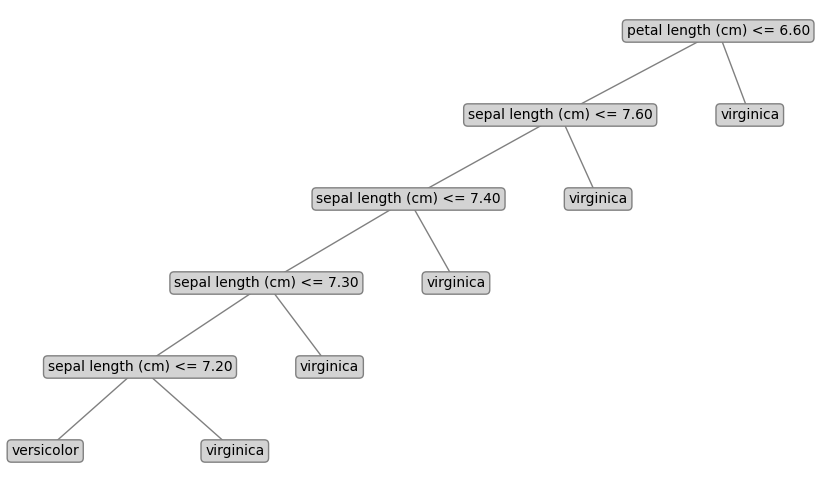

In [ ]:
import matplotlib.pyplot as plt

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        num_classes = len(set(y))

        if depth == self.max_depth or num_classes == 1:
            return {'class': int(max(set(y.tolist()), key=y.tolist().count))}

        best_split = self._find_best_split(X, y, num_samples, num_features)

        left_indices = best_split['left_indices']
        right_indices = best_split['right_indices']
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature_index': best_split['feature_index'],
                'threshold': best_split['threshold'],
                'left': left_tree,
                'right': right_tree}

    def _find_best_split(self, X, y, num_samples, num_features):
        best_gini = float('inf')
        best_split = {}

        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            unique_values = set(feature_values)

            for threshold in unique_values:
                left_indices = []
                right_indices = []
                for sample_index in range(num_samples):
                    if feature_values[sample_index] <= threshold:
                        left_indices.append(sample_index)
                    else:
                        right_indices.append(sample_index)

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._calculate_gini_index(y, left_indices, right_indices)
                if gini < best_gini:
                    best_gini = gini
                    best_split = {'feature_index': feature_index,
                                  'threshold': threshold,
                                  'left_indices': left_indices,
                                  'right_indices': right_indices}

        return best_split

    def _calculate_gini_index(self, y, left_indices, right_indices):
        num_left = len(left_indices)
        num_right = len(right_indices)
        total = num_left + num_right

        gini_left = 1 - sum([(y[i] / num_left) ** 2 for i in left_indices])
        gini_right = 1 - sum([(y[i] / num_right) ** 2 for i in right_indices])

        gini = (num_left / total) * gini_left + (num_right / total) * gini_right
        return gini

    def predict(self, X):
        predictions = []
        for sample in X:
            predictions.append(self._predict_sample(sample, self.tree))
        return predictions

    def _predict_sample(self, sample, tree):
        if 'class' in tree:
            return tree['class']

        feature_value = sample[tree['feature_index']]
        if feature_value <= tree['threshold']:
            return self._predict_sample(sample, tree['left'])
        else:
            return self._predict_sample(sample, tree['right'])

    def plot_tree(self, feature_names=None, class_names=None):
        plt.figure(figsize=(10, 6))
        self._plot_tree_recursive(self.tree, feature_names, class_names)
        plt.axis('off')
        plt.show()

    def _plot_tree_recursive(self, node, feature_names, class_names, depth=0, pos=None):
        if pos is None:
            pos = {depth: (0.5, 1)}
        if 'class' in node:
            plt.text(pos[depth][0], 1 - depth * 0.1, class_names[node['class']], ha='center', va='center',
                     bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.3'))
            return

        feature_name = feature_names[node['feature_index']]
        threshold = node['threshold']

        plt.text(pos[depth][0], 1 - depth * 0.1, f'{feature_name} <= {threshold:.2f}', ha='center', va='center',
                 bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.3'))

        left_count = self._count_nodes(node['left'])
        right_count = self._count_nodes(node['right'])

        left_width = left_count / (left_count + right_count)
        right_width = right_count / (left_count + right_count)

        left_pos = (pos[depth][0] - left_width / 2, 1 - (depth + 1) * 0.1)
        right_pos = (pos[depth][0] + right_width / 2, 1 - (depth + 1) * 0.1)

        plt.plot([pos[depth][0], left_pos[0]], [1 - depth * 0.1, 1 - (depth + 1) * 0.1], color='gray', linestyle='-', linewidth=1, zorder=1)
        plt.plot([pos[depth][0], right_pos[0]], [1 - depth * 0.1, 1 - (depth + 1) * 0.1], color='gray', linestyle='-', linewidth=1, zorder=1)
        plt.scatter(left_pos[0], 1 - (depth + 1) * 0.1, marker='<', color='black', s=100, zorder=2)
        plt.scatter(right_pos[0], 1 - (depth + 1) * 0.1, marker='>', color='black', s=100, zorder=2)

        self._plot_tree_recursive(node['left'], feature_names, class_names, depth + 1, pos={**pos, depth + 1: left_pos})
        self._plot_tree_recursive(node['right'], feature_names, class_names, depth + 1, pos={**pos, depth + 1: right_pos})

    def _count_nodes(self, node):
        if 'class' in node:
            return 1
        return self._count_nodes(node['left']) + self._count_nodes(node['right'])

clf = DecisionTree(max_depth=5)
clf.fit(X_train, y_train)

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_names = iris.target_names
clf.plot_tree(feature_names=feature_names, class_names=class_names)
